In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
df = pd.read_csv('./data/rtt_throughput (6).csv')

df.sort_values(by=['rtt'])

,rtt,throughput
81,2.0,51.28192
220,2.0,47.87200
221,2.0,90.22464
74,2.0,0.00000
75,2.0,52.07040
...,...,...
406,52.0,17.80736
407,52.0,19.43552
431,67.0,9.12384
430,67.0,15.55456


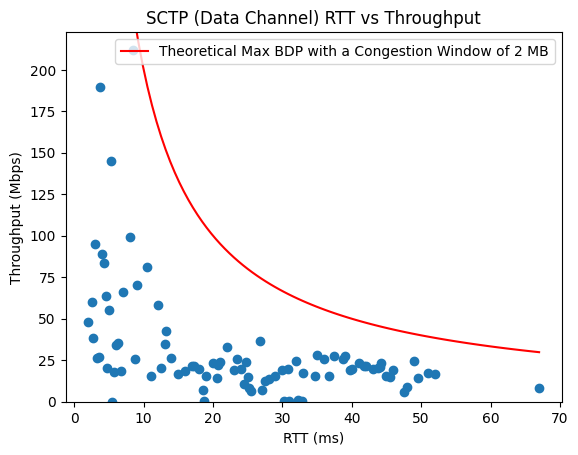

In [50]:
def plot_rtt_vs_throughput(df, title):
    agged = df.groupby('rtt').mean()
    plt.scatter(agged.index, agged['throughput'])
    plt.xlabel('RTT (ms)')
    plt.ylabel('Throughput (Mbps)')

    #set y axis to start at 0
    plt.ylim(0, None)   


    plt.title(title)


    rtt_values = np.linspace(agged.index.min(), agged.index.max(), 100)
    throughput_values = 2 / (rtt_values / 1000)
    plt.plot(rtt_values, throughput_values, label='Theoretical Max BDP with a Congestion Window of 2 MB', color='red')

    # add a legend
    plt.legend()

    plt.show()

    return plt


plt = plot_rtt_vs_throughput(df, 'SCTP (Data Channel) RTT vs Throughput')


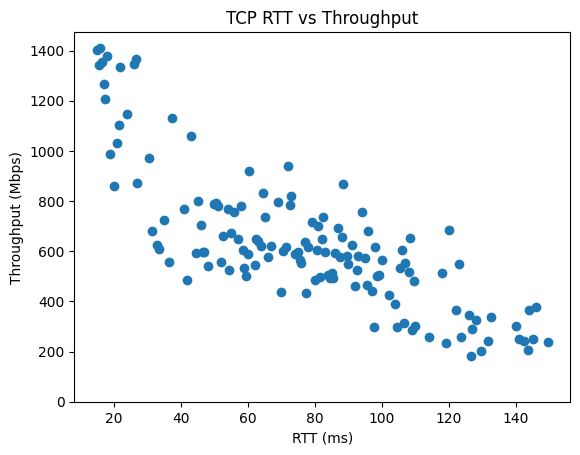

In [40]:
http = pd.read_csv('./data/http_rtt_throughput.csv')

http = http[http['rtt'] < 150]

httpAgged = http.groupby('rtt').mean()

plot_rtt_vs_throughput(httpAgged, "TCP RTT vs Throughput")    

Text(0.5, 1.0, 'RTT vs Throughput')

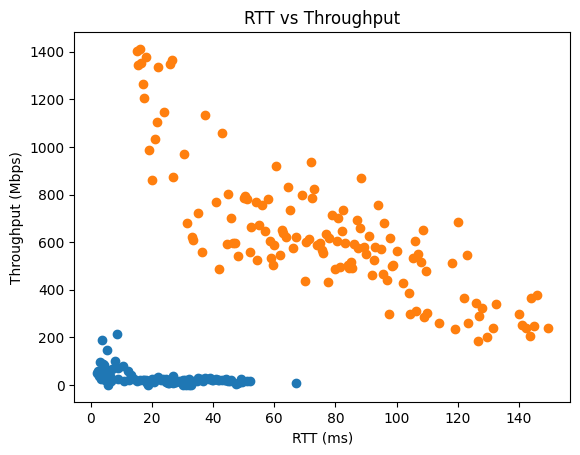

In [28]:
# put em both in one graph
plt.scatter(agged.index, agged['throughput'], label='Data Channel: SCTP')
plt.scatter(httpAgged.index, httpAgged['throughput'], label='HTTP')
plt.xlabel('RTT (ms)')
plt.ylabel('Throughput (Mbps)')
plt.title('RTT vs Throughput')

